### Data Analysis of Yeast Treatment Experiments on Different Strains

*This notebook examines the dataset from the Yeast treatment experiment and creates boxplots to illustrate the relationship between the treatment given to the yeast cells and the inflection point in their doubling time.*

First lets import all required libraries throughout this notebook. These include libraries for structuring the data and drawing boxplots.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

Import labels for certain columns of the dataset. These columns will include Doubling time, Yeast strain and Treatment type

In [3]:
# Select 3 columns from the dataset
df = pd.read_csv('./Dataset/Yeast_cell_dataset.csv', usecols = ['DT inflection','Strain', 'Treatment'])
print(df.shape)
df.head(20)

(2840, 3)


,DT inflection,Strain,Treatment
0,88.642690,BY4743,1 uM Torin 1
1,84.383101,BY4743,2.5% DMSO
2,75.622916,DBVPG 6765,1 uM Torin 1
3,75.872172,DBVPG 6765,2.5% DMSO
4,83.891908,SK1,1 uM Torin 1
5,105.568165,SK1,2.5% DMSO
6,77.611077,Y55,1 uM Torin 1
7,72.683174,Y55,2.5% DMSO
8,25.117997,YPS128,1 uM Torin 1
9,13.931581,YPS128,2.5% DMSO


Now we drop all rows in which Doubling Time Inflection data is not available.

In [4]:
# Drop empty / NA rows
df.dropna(inplace = True)
print(df.shape)
df.head(20)

(2724, 3)


,DT inflection,Strain,Treatment
0,88.642690,BY4743,1 uM Torin 1
1,84.383101,BY4743,2.5% DMSO
2,75.622916,DBVPG 6765,1 uM Torin 1
3,75.872172,DBVPG 6765,2.5% DMSO
4,83.891908,SK1,1 uM Torin 1
5,105.568165,SK1,2.5% DMSO
6,77.611077,Y55,1 uM Torin 1
7,72.683174,Y55,2.5% DMSO
8,25.117997,YPS128,1 uM Torin 1
9,13.931581,YPS128,2.5% DMSO


Lets view and store all the unique yeast strains we have in our dataset.

In [5]:
strain = pd.unique(df['Strain'])
print(strain.shape)
print(strain)

(88,)
['BY4743' 'DBVPG 6765' 'SK1' 'Y55' 'YPS128' 'DBVPG 6044' 'DBVPG 1788'
 'DBVPG 1373' 'DBVPG 1853' 'L-1528' 'Y12' 'DBVPG 1106' 'K11' 'YS4' 'YS9'
 '322134 S ' '378604 X' '273614 N' 'Y6.5' 'Q62.5' 'Q89.8' 'KPN3828' 'Y9.6'
 'Q74.4' 'Q69.8' 'W7' 'Q31.4' 'Y8.5' 'Z1' 'CBS432' 'Y8.1' 'KPN3829'
 'UFRJ50791' 'IFO1804' 'UWOPS91-917.1' 'CLIB324' 'PW5' 'UWOPS83-787.3'
 'NCYC361' 'W303' 'Y10' 'FM527' 'T21.4' 'Q95.3' 'A4' 'YJM978' 'Y9'
 'UWOPS03-461.4 ' 'UWOPS05-217.3 ' 'S288c ' 'UWOPS05-227.2 ' 'DBVPG 6040 '
 'YIIc17_E5 ' 'YJM981 ' 'YJM975 ' 'NCYC110 ' 'YS2 ' 'T7' 'FL100' 'UC5'
 'T73' 'CLIB215' 'YJM269' 'CLIB382' 'CBS7960' 'FM479' 'BC187' 'YPS606'
 'L-1374' 'UWOPS87-2421' 'FM476' 'FM356' 'FM677' 'N-45' 'UFRJ50816' 'N-44'
 'N-17' 'Q59.1' 'YPS138' 'S36.7' 'Y7' 'Q32.3' 'Z1.1' 'DBVPG 4650' 'N-43'
 'CBS5829' 'DBVPG 6304' 'A12']


Lets view and store all the unique treatments we have in our dataset.

In [6]:
treatment = pd.unique(df['Treatment'])
print(treatment.shape)
print(treatment)

(10,)
['1 uM Torin 1' '2.5% DMSO' '1% DMSO' '20 ng/mL RAPA' '2.5 ng/mL RAPA'
 '6.67% H2O' '25 uM Torin 1' '100 uM GDC0941' '1 mg/mL Caffeine'
 '100 uM AZD8055']


**Let's try making a boxplot for the first strain.**

We'll start by isolating the data consisiting of the first strain.

In [7]:
# Store the first strain (strain[0])
df_first_strain = df[ df['Strain'] == strain[0] ]
df_first_strain.head()

,DT inflection,Strain,Treatment
0,88.642690,BY4743,1 uM Torin 1
1,84.383101,BY4743,2.5% DMSO
48,71.956550,BY4743,1% DMSO
49,260.047128,BY4743,20 ng/mL RAPA
88,72.520115,BY4743,1 uM Torin 1


Now lets list the DT inflection for each Treatment in the first strain.

In [34]:
# Store DT inflection of the first strain arranged by treatment
first_strain_treatments = [] 
for i,t in enumerate(treatment):
    temp = df_first_strain[ df_first_strain['Treatment'] == t ]
    first_strain_treatments.append(temp['DT inflection'].tolist())
    print('*** '+ t +' ***')
    print(first_strain_treatments[i])

*** 1 uM Torin 1 ***
[88.64268986, 72.52011549, 77.47018168, 80.03388838, 76.64048776, 81.15689808, 80.74565844, 80.94730107, 87.7349638, 79.015773, 75.49194741, 22.44303054, 80.34358737, 66.32216909]
*** 2.5% DMSO ***
[84.38310148, 75.80880433, 75.54400685, 68.88651677, 77.37977975, 76.33855158, 79.9449928, 81.4684331, 78.64974328, 81.30649542, 79.70570942, 77.20347584, 76.87473325, 80.34060506, 76.48963591, 76.22787514, 76.3039197, 76.97978683, 87.60139813, 81.50895056, 81.05003245, 79.12113992, 61.10590795, 78.24745529, 72.60216312, 77.3352617, 83.71443923, 74.27269104, 77.81167031, 76.87661413, 76.47455606, 75.58075343, 78.21455271, 79.58370045, 80.18053203, 68.57076026]
*** 1% DMSO ***
[71.95654991, 69.39323588, 71.80068565, 72.75335931, 71.22402774, 76.61181509, 71.55013443, 70.1853122, 73.5992666, 72.78558069, 71.63980236, 76.35258739, 73.85627932, 70.25372001, 74.28980159, 74.23962473, 73.92783866, 77.4941699, 73.74407088, 71.72310359, 68.36150617]
*** 20 ng/mL RAPA ***
[260.04

Finally, we can create the boxplot for the first strain.

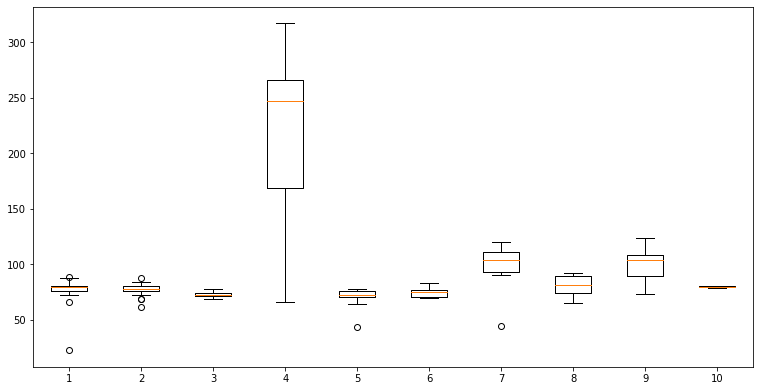

In [35]:
# Set plot size
fig = plt.figure(figsize =(10, 5))
# Create axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Create plot
bp = ax.boxplot(first_strain_treatments)
# Show plot
plt.show()

**Now that we have seen how to create a boxplot for a some data, lets create boxplots for all yeast strains.**

First, lets define a generic boxplot function with all the labels and color codes set as default.

In [33]:
def yeast_boxplot(selected_strain, treatment_list, strain_name):
    """
    selected_strain -> Data of strain selected arranged by treatment. This is used as raw data to generate the boxplot.
    treatment_list -> The list of the treatments in the dataset. This is used for labling the boxplot's x-axis.
    strain_name -> The name of the current strain selected. This is used for labling the boxplot's heading.
    
    """
    fig, ax1 = plt.subplots(figsize=(10, 6))

    bp = ax1.boxplot(selected_strain, notch=False, sym='+', vert=True, whis=1.5)
    # plt.setp(bp['fliers'], color='red', marker='+')

    # Add a light horizontal grid to the plot
    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

    ax1.set(
        axisbelow=True,  # Hide the grid behind plot objects
        title='Comparison of Treatment and Doubling Time Inflection for the \''+ strain_name +'\' Yeast Strain',
        xlabel='Treatment',
        ylabel='Doubling Time',
    )

    # Fill the boxes with desired colors
    box_colors = ['red', 'royalblue', 'orange', 'lime', 'cyan']
    num_boxes = len(selected_strain)
    medians = np.empty(num_boxes)
    for i in range(num_boxes):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
        for j in range(5):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        # Alternate between the colors
        ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % len(box_colors)]))

        # Now draw the median lines back over what we just filled in
        med = bp['medians'][i]
        median_x = []
        median_y = []
        for j in range(2):
            median_x.append(med.get_xdata()[j])
            median_y.append(med.get_ydata()[j])
            ax1.plot(median_x, median_y, 'k')
        medians[i] = median_y[0]
        # Finally, overplot the sample medians, with horizontal alignment in the center of each box
        ax1.plot(np.average(med.get_xdata()), np.average(selected_strain[i]), color='w', marker='*', markeredgecolor='k')

    # Set the axes ranges and axes labels
    ax1.set_xlim(0.5, num_boxes + 0.5)
    top = 40
    bottom = -5
    # ax1.set_ylim(bottom, top)
    ax1.set_xticklabels(treatment_list,rotation=45, fontsize=8)

    plt.show()

Now, lets loop through all the yeast strains in the dataset and create boxplots for each strain. Each boxplot will show the relationship between the treatment applied to that strain and the inflection point to their doubling time.

In [107]:
for st in strain:
    df_selected_strain = df[ df['Strain'] == st ] # Select all rows for the current strain
    selected_strain = []
    for i,t in enumerate(treatment): 
        temp = df_selected_strain[ df_selected_strain['Treatment'] == t ] # Select each treatment for the current Strain
#         print(temp.values.tolist())
        selected_strain.append(temp['DT inflection'].tolist()) # Store Doubling Time for each Treatment for the current Strain

#     yeast_boxplot(selected_strain, treatment.tolist(), st)
#     print(selected_strain)

**Clustering treatments by their Doubling Time Inflection values**

Lets create a scatter plot where we cluster treatments based on their DT Inflection values individually for each strain. We do this do visualize the differences in DT Inflection values caused by different types of treatments.

First, lets try the visualization only on the first strain.

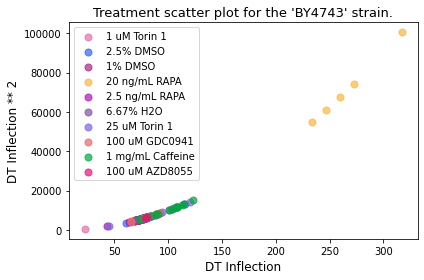

In [117]:
fig, ax = plt.subplots()
color = ['red', 'royalblue', 'cyan', 'orange', 'green', 'yellow', 'lime']
get_colors = lambda n: ["#%06x" % np.random.randint(0, 0xFFFFFF) for _ in range(n)] # Get a random HEX color
colors = get_colors(len(treatment)) # Get a list of random colors

for i, fs_st_tr in enumerate(first_strain_treatments):
    x = fs_st_tr
    y = [i ** 2 for i in x]
#     c = np.random.randint(1, 5, size=len(fs_st_tr))
#     s = np.random.randint(10, 220, size=N)
    c = colors[i]
    scatter = ax.scatter(x, y, c=c, s=50, alpha=0.7, label=treatment[i])

ax.set_xlabel(r'DT Inflection', fontsize=12)
ax.set_ylabel(r'DT Inflection ** 2', fontsize=12)
ax.set_title('Treatment scatter plot for the \''+strain[0]+'\' strain.', fontsize=13)
plt.legend()

# ax.grid(True)
fig.tight_layout()

plt.show()

Now, lets create a scatter plot for the rest of the Yeast strains. To do this, lets first define a generic function that allows to create scatter plots.

In [90]:
def yeast_scatter_plot(strain_treatments, strain):
    fig, ax = plt.subplots()
    get_colors = lambda n: ["#%06x" % np.random.randint(0, 0xFFFFFF) for _ in range(n)] # Get a random HEX color
    colors = get_colors(len(treatment)) # Get a list of random colors

    for i, st_tr in enumerate(strain_treatments):
        x = st_tr
        y = [i ** 2 for i in x]
        c = colors[i]
        scatter = ax.scatter(x, y, c=c, s=50, alpha=0.7, label=treatment[i])

    ax.set_xlabel(r'DT Inflection', fontsize=15)
    ax.set_ylabel(r'DT Inflection ** 2', fontsize=15)
    ax.set_title('Treatment scatter plot for the strain: \''+ strain +'\'', fontsize=13)
    plt.legend()
    plt.show()

Finally, we can iterate through every strain and create scatter plots for each of them.

In [109]:
for st in strain:
    df_selected_strain = df[ df['Strain'] == st ] # Select all rows for the current strain
    selected_strain = []
    for i,t in enumerate(treatment): 
        temp = df_selected_strain[ df_selected_strain['Treatment'] == t ] # Select each treatment for the current Strain
#         print(temp.values.tolist())
        selected_strain.append(temp['DT inflection'].tolist()) # Store Doubling Time for each Treatment for the current Strain

#     yeast_scatter_plot(selected_strain, st)